# Which Neighborhood in Pittburgh has the best drivers and roads?

 ### By Ben Radovic, Sam Aziz, and Brian Fang
 
 

### Introduction

Over 80% of US adults are licensed to drive, which is clearly the vast majority. Pittsburgh, however, has a reputation for having some pretty subpar drivers. Through this project, we decided we wanted to analyze different datasets and determine which neighborhood had the best drivers and roads in general.

### Metrics and Datasets we used:

Metrics:
* Average traffic counts taken at the neighborhoods at random times
* Number of Crashes recorded per neighborhood
* Number of bike lane blockages by vehicles per neighborhood

Datasets:
* [Pittburgh Neighborhoods](https://data.wprdc.org/dataset/neighborhoods2)

This dataset contained information about the Pittrburgh neighborhoods and what coordinates they occupied so we could relate the other datasets' values to the proper pplace
* [Traffic Counts Data](https://data.wprdc.org/dataset/allegheny-county-traffic-counts/resource/8edd8a76-8607-4ed3-960f-dcae914fd937?view_id=838354b4-3f5d-46ab-ad01-06c1dc233472)

This dataset contained several different random vehicle counts at a traffic sensor taken at random times

* [Crash Data](https://data.wprdc.org/dataset/allegheny-county-crash-data/resource/e3b145c0-41ba-4cc9-9054-8f686ac59643)

This dataset contained records of different crashes at the neighborhoods.

* [Protected Bike Lane Data](https://data.wprdc.org/dataset/data-protected-bike-lanes-oct-2019/resource/6f53b0c2-4919-4145-adb6-7f1622437b7e)

This dataset listed the instances where a car waas blocking a bike lane and the type of violaion as well

### First Submetric: Traffic Counts for Each Neighborhood
#### By Ben Radovic

In [95]:
import geopandas as gpd
import pandas as pd

# Load in neighborhoods
neighborhoods_data = gpd.read_file("Ben's Traffic Data and Notebook/Neighborhoods_.shp")

neighborhoods_data.head(3)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."


We can relate the latitude and longitude from the database of traffic counts to the actual neighborhood names by checking if they fall within those of each polygon object within this dataset

Now we will load in the dataset with the traffic counts

In [96]:
# Load in the traffic counts
counts = gpd.read_file("Ben's Traffic Data and Notebook/data-trafficcounts.csv")

counts.head(3)

,sensor_ID,Longitude,Latitude,1a,2a,3a,4a,5a,6a,7a,...,4p,5p,6p,7p,8p,9p,10p,11p,12a,geometry
0,5879@1,-79.86152302,40.62539823,44,19,14,18,36,151,362,...,604,678,790,575,431,416,227,188,119,None
1,5970@1,-79.79640914,40.44504722,18,19,24,31,100,223,356,...,561,535,402,315,258,200,119,78,36,None
2,5957@1,-79.82097619,40.48762446,60,36,39,27,45,165,395,...,637,662,715,611,511,429,247,170,106,None


Next, we will create a new dataset that is much easier to read and will be utilized for all datasets

In [97]:
neighborhoods = pd.DataFrame(columns = ["Neighborhood", "Geometry", "WS", "Highest_Traffic","Number_Of_Crashes","Bike Lane Violation Score"])
neighborhoods["Neighborhood"] = neighborhoods_data["hood"]
neighborhoods["Geometry"] = neighborhoods_data["geometry"]
neighborhoods["Highest_Traffic"] = 0
neighborhoods["Number_Of_Crashes"] = 0
neighborhoods["Bike Lane Violation Score"] = 0
neighborhoods["WS"] = 0

neighborhoods.head(3)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0,0,0,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0,0,0,0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0,0,0,0


Now, we can iterate through the traffic data and assign the highest value to each neighborhood.

In [98]:
from shapely.geometry import Point

for i, count in counts.iterrows():
    # Search for the day with the highest count
    highest = counts.loc[i, "1a":"12a"].max()
    # Create a point out of the latitude and longitude
    pt = Point(float(count["Longitude"]), float(count["Latitude"]))
    for j, neighborhood in neighborhoods.iterrows():
        # Add the count to the proper neighborhood
        if neighborhood["Geometry"].contains(pt):
            neighborhoods.at[j, 'Highest_Traffic'] = float(highest)
            # Break to save time once found
            break
            
neighborhoods.head(3)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0,82.0,0,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0,94.0,0,0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0,82.0,0,0


Now we will sort the data within the dataframe.

In [99]:
# Create a mask to ensure only the neighborhoods with data are portrayed
query_mask = neighborhoods['Highest_Traffic'] > 0
neighborhoods_masked = neighborhoods[query_mask]
# Sort in ascending order to see the neighborhoods with the least average traffic
neighborhoods_sorted = neighborhoods_masked.sort_values("Highest_Traffic", ascending = True)

neighborhoods_sorted.head(10)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
79,Spring Garden,"POLYGON ((-79.98687 40.47413, -79.98598 40.472...",0,8.000000,0,0
47,Brighton Heights,"POLYGON ((-80.04078 40.49142, -80.03756 40.490...",0,9.000000,0,0
65,Troy Hill,"MULTIPOLYGON (((-79.97766 40.46653, -79.97771 ...",0,9.000000,0,0
83,Perry South,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",0,9.000000,0,0
48,South Side Slopes,"POLYGON ((-79.99713 40.42920, -79.99547 40.428...",0,9.500000,0,0
49,Arlington,"POLYGON ((-79.95773 40.41871, -79.95769 40.418...",0,9.666667,0,0
17,Homewood North,"POLYGON ((-79.89446 40.46255, -79.89446 40.462...",0,50.000000,0,0
55,East Hills,"POLYGON ((-79.87523 40.45979, -79.87448 40.459...",0,58.000000,0,0
69,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",0,63.000000,0,0
70,Sheraden,"POLYGON ((-80.03990 40.45262, -80.03994 40.452...",0,75.000000,0,0


So far, we can see that Spring Garden has the least average traffic counts according to this dataset. Let's now go ahead and plot the 25 neighborhoods with the lowest average traffic counts.

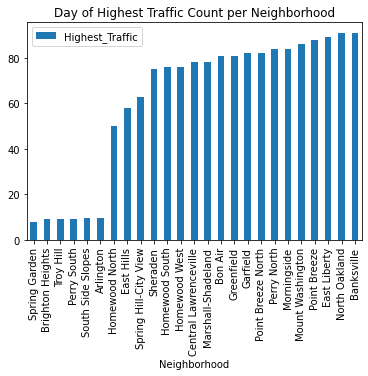

In [100]:
plt = neighborhoods_sorted.iloc[:25].plot(kind='bar', x="Neighborhood", y="Highest_Traffic", title="Day of Highest Traffic Count per Neighborhood")

Now we will list the neighborhoods with the 10 highest average traffic counts.

In [101]:
neighborhoods_descending = neighborhoods_masked.sort_values("Highest_Traffic", ascending = False)

neighborhoods_descending.head(10)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
73,St. Clair,"POLYGON ((-79.96995 40.41188, -79.96932 40.411...",0,997.0,0,0
72,Beechview,"POLYGON ((-80.02121 40.42342, -80.02111 40.423...",0,993.0,0,0
21,Lincoln-Lemington-Belmar,"MULTIPOLYGON (((-79.90496 40.48522, -79.90470 ...",0,986.0,0,0
33,Crafton Heights,"POLYGON ((-80.04222 40.44447, -80.04241 40.444...",0,984.0,0,0
87,Elliott,"POLYGON ((-80.02795 40.44463, -80.02806 40.444...",0,983.0,0,0
60,Hazelwood,"POLYGON ((-79.95505 40.42713, -79.95498 40.427...",0,981.0,0,0
63,Upper Hill,"POLYGON ((-79.95848 40.44846, -79.95861 40.448...",0,977.0,0,0
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",0,976.0,0,0
36,Highland Park,"POLYGON ((-79.91356 40.48644, -79.91354 40.486...",0,967.0,0,0
25,Hays,"POLYGON ((-79.95606 40.40916, -79.95625 40.408...",0,964.0,0,0



Let's plot the neighborhoods with the 25 highest traffic counts.

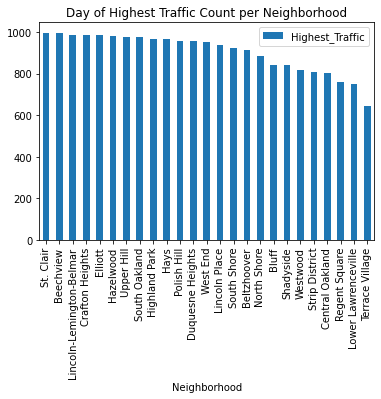

In [102]:
plt2 = neighborhoods_descending.iloc[:25].plot(kind='bar', x="Neighborhood", y="Highest_Traffic", title="Day of Highest Traffic Count per Neighborhood")

Finally, I will upload the traffic counts to the original geodataframe to plot it.

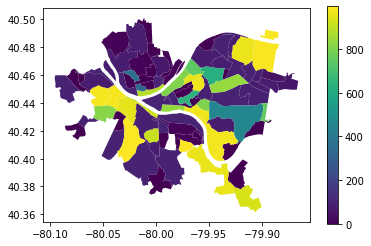

In [103]:
neighborhoods_data["1a"] = neighborhoods["Highest_Traffic"]

neighborhoods_data.plot(column="1a", legend=True)

This is the end of the data analysis for the traffic counts for different neighborhoods. On this geodataframe, the lower numbers (purple-blueish on the diagram) are actually better because they signify lower traffic counts, and those are what I am considering to be the better neighborhoods.

### Second Submetric: Number of Crashes Per Neighborhood

#### By Brian Fang

In [104]:
import geopandas as gpd
import pandas as pd

# Load in the neighborhood data
neighborhoods_data = gpd.read_file("Brian's Crash Data and Notebook/Neighborhoods_.shp")

neighborhoods_data.head(5)

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."


We will utilize the geometry column and neighborhood name column to relate the latitude and longitude provided in the crash data dataset to the actual neighborhoods. Thus, we will be able to add the collision data to the proper neighborhood.

In the cell below, we will load in the crash data

In [105]:
# Load in the crash counts
counts = gpd.read_file("Brian's Crash Data and Notebook/crash-data.csv")

counts.head(5)

,CRASH_CRN,DISTRICT,CRASH_COUNTY,MUNICIPALITY,POLICE_AGCY,CRASH_YEAR,CRASH_MONTH,DAY_OF_WEEK,TIME_OF_DAY,HOUR_OF_DAY,...,RDWY_ORIENT,ROAD_OWNER,ROUTE,SPEED_LIMIT,SEGMENT,OFFSET,STREET_NAME,TOT_INJ_COUNT,SCHOOL_BUS_UNIT,geometry
0,2021000002,11,02,02113,02113,2021,01,6,0028,00,...,N,2,0130,35,0142,490,BEULAH RD,4,,None
1,2021000007,11,02,02113,02113,2021,01,6,0100,01,...,U,4,,,,,LAKETON RD,0,,None
2,2021000017,11,02,02301,02301,2021,01,6,0140,01,...,N,4,,25,,,SARANAC AV,0,,None
3,2021000020,11,02,02113,02113,2021,01,6,0303,03,...,E,4,,25,,,UNIVERSAL RD,0,,None
4,2021000026,11,02,02304,02304,2021,01,6,0120,01,...,S,4,,25,,,COURSIN ST,1,,None


In the cell below, we will iterate through all rows of the crash data dataset and add to the "Number_Of_Crashes" column in our dataframe accordingly for each neighborhood.

In [106]:
from shapely.geometry import Point

for i, count in counts.iterrows():
    # Create a point out of the latitude and longitude
    try:
        latitude = float(count["DEC_LAT"])
        longitude = float(count["DEC_LONG"])
        pt = Point(longitude, latitude)
        for j, neighborhood in neighborhoods.iterrows():
            # Add the count to the proper neighborhood
            if neighborhood["Geometry"].contains(pt):
                neighborhoods.at[j, 'Number_Of_Crashes'] = neighborhood['Number_Of_Crashes'] + 1
                # Break to save time once found
                break
    except:
        next
            
neighborhoods.head(5)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0,82.0,41,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0,94.0,73,0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0,82.0,21,0
3,Bedford Dwellings,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",0,0.0,15,0
4,Knoxville,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",0,0.0,33,0


In the cell below, we will sort the data in ascending order to see the neighborhoods with the fewest crashes (which will be considered better for our metric).

In [107]:
# Mask data so only the neighborhoods with data are portrayed
query_mask = neighborhoods['Number_Of_Crashes'] > 0
neighborhoods_masked = neighborhoods[query_mask]
# Sort in ascending order to see the neighborhoods with the least collisions
neighborhoods_sorted = neighborhoods_masked.sort_values("Number_Of_Crashes", ascending = True)

neighborhoods_sorted.head(10)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
67,Mt. Oliver,"POLYGON ((-79.97842 40.40626, -79.97848 40.406...",0,0.0,3,0
37,New Homestead,"POLYGON ((-79.91621 40.39849, -79.91621 40.398...",0,0.0,3,0
50,Chartiers City,"POLYGON ((-80.06919 40.46046, -80.06912 40.460...",0,0.0,3,0
10,Glen Hazel,"POLYGON ((-79.92030 40.41205, -79.92027 40.412...",0,0.0,4,0
28,East Carnegie,"POLYGON ((-80.07255 40.42533, -80.07245 40.424...",0,0.0,4,0
23,Fairywood,"POLYGON ((-80.08808 40.45975, -80.08803 40.459...",0,94.0,4,0
63,Upper Hill,"POLYGON ((-79.95848 40.44846, -79.95861 40.448...",0,977.0,8,0
73,St. Clair,"POLYGON ((-79.96995 40.41188, -79.96932 40.411...",0,997.0,8,0
68,California-Kirkbride,"POLYGON ((-80.01642 40.45928, -80.01640 40.459...",0,377.0,9,0
85,Regent Square,"POLYGON ((-79.89709 40.42765, -79.89661 40.427...",0,759.5,9,0


From this table, we can see that three neighborhoods (Mt. Oliver, New Homestead, and Chartiers City) are all tied for the least number of crashes at 3. In the cell below, I will plot the 25 neighborhoods with the least collisions.

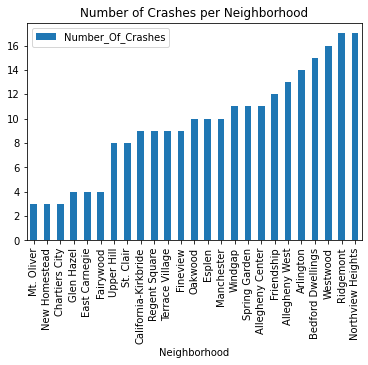

In [108]:
plt = neighborhoods_sorted.iloc[:25].plot(kind='bar', x="Neighborhood", y="Number_Of_Crashes", title="Number of Crashes per Neighborhood")

Now, I will also list and plot the 25 neighborhoods with the most collisions to give another perspective.

In [109]:
neighborhoods_descending = neighborhoods_masked.sort_values("Number_Of_Crashes", ascending = False)

neighborhoods_descending.head(10)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
43,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",0,97.5,230,0
80,Squirrel Hill South,"POLYGON ((-79.94475 40.44101, -79.94405 40.440...",0,457.0,223,0
88,South Side Flats,"POLYGON ((-79.97726 40.43272, -79.97725 40.432...",0,96.0,180,0
27,Greenfield,"POLYGON ((-79.92673 40.41886, -79.92692 40.418...",0,81.0,159,0
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",0,976.0,134,0
51,Carrick,"POLYGON ((-79.99194 40.40719, -79.99191 40.407...",0,95.0,134,0
22,Bluff,"POLYGON ((-79.99390 40.43893, -79.99381 40.438...",0,839.0,131,0
54,Mount Washington,"POLYGON ((-79.99927 40.42915, -79.99927 40.429...",0,86.0,116,0
24,Brookline,"POLYGON ((-80.00172 40.40193, -80.00171 40.401...",0,97.0,95,0
29,North Shore,"POLYGON ((-79.99529 40.44985, -79.99535 40.449...",0,886.0,90,0


The Central Business District has the most, which makes sense because that is downtown Pittsburgh.

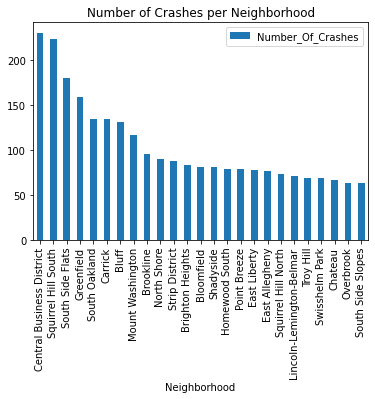

In [110]:
plt2 = neighborhoods_descending.iloc[:25].plot(kind='bar', x="Neighborhood", y="Number_Of_Crashes", title="Number of Crashes per Neighborhood")

In the cell below, I will finish by uploading the crash counts to the geodataframe to provide a visual representation.

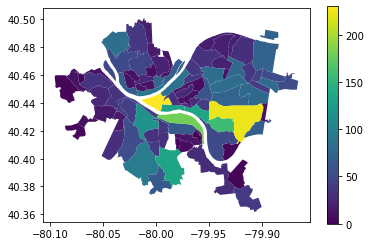

In [111]:
neighborhoods_data["VEHICLE_COUNT"] = neighborhoods["Number_Of_Crashes"]

neighborhoods_data.plot(column="VEHICLE_COUNT", legend=True)

This is the end of the analysis for the number of collisions per neighborhood. On the diargram above, the darker purple regions are "better" because they signify much less collisions than the brighter green and yellow areas.

### Third Submetric: Bike Lane Violations by Vehicles

#### By Sam Aziz

In [112]:
import geopandas as panda
import pandas as p
data = panda.read_file("Sam's Bike Data and Notebook/datapbl_pgh.csv")
data.head()

,report_id,vehicle_type,vehicle_movement,plate_state,created_at_local,created_at_epoch,address,latitude,longitude,geometry
0,21645,Other,standing,PA,2019-10-16T08:18:48,1571228328000,"4609 Forbes Ave, Pittsburgh, PA 15213",40.44459444444444,-79.94809722222223,None
1,21734,Private,standing,PA,2019-10-16T17:15:58,1571260558000,"305 Wood St, Pittsburgh, PA 15222",40.4389424,-80.0016382,None
2,21640,Other,parked,PA,2019-10-16T08:02:54,1571227374000,"4615 Forbes Ave, Pittsburgh, PA 15213",40.44456944444444,-79.94785277777778,None
3,21641,Other,standing,US,2019-10-16T12:16:42,1571242602000,"30 Foster Sq, Pittsburgh, PA 15212",40.4511631,-80.0073019,None
4,21608,Private,Loading,PA,2019-10-16T08:16:14,1571228174000,"6 PPG Pl, Pittsburgh, PA 15222",40.4397019,-80.0036409,None


This Data gives us the longitude and latitude of each of vehicle blocking a bike lane, but to find the neighborhoods they are in, we will need to use a neighborhood data set that gives us the polygons enclosing each neighborhood

for each neighborhood, I will give it a score on bike lane blockages. Standing and loading vehicles will give it +1 and parked vehicles will give it +2

I figured since a loading or standing car usually has a person attending it and ready to move it soon, those were not as bad as a parked car, where the driver may be gone for any amount of time

In [115]:
neighborData = panda.read_file("Sam's Bike Data and Notebook/Neighborhoods_.shp")
neighborData.head()

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,created_us,created_da,last_edite,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.153647e+06,14047.065024,"POLYGON ((-79.90560 40.45522, -79.90553 40.455..."
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.407739e+07,30347.886823,"POLYGON ((-79.91309 40.43804, -79.91321 40.438..."
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275116e+07,14577.441571,"POLYGON ((-79.93457 40.47217, -79.93455 40.472..."
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.997845e+06,14216.959213,"POLYGON ((-79.96601 40.45520, -79.96596 40.454..."
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,SDE,2020-08-14,SDE,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.410563e+06,12003.269761,"POLYGON ((-79.98845 40.41851, -79.98821 40.418..."



This data gives us the longitude and lattitude of the different neighborhoods.

In [114]:
neighborhoods["Total Violations"] = 0
neighborhoods["Total Parked"] = 0
neighborhoods["Total Standing"] = 0
neighborhoods["Total Loading"] = 0

neighborhoods.head(3)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score,Total Violations,Total Parked,Total Standing,Total Loading
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0,82.0,41,0,0,0,0,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0,94.0,73,0,0,0,0,0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0,82.0,21,0,0,0,0,0


Now that we have the Polygon data, but we need to add the bike lane vil

In [116]:
from shapely.geometry import Point 

##print(bikeData.iterrows().size())
for i, datum in data.iterrows(): #iterate through the bike lane violations
    pt = Point(float(datum["longitude"]), float(datum["latitude"]))
    violationType = datum["vehicle_movement"]
    for j, hood in neighborhoods.iterrows(): ##finding the neighborhood that this violation is in
        if hood["Geometry"].contains(pt): ##if the current neighborhood contains the point, then its the one our violation is in
            if violationType == "parked": ## for parked we add +2
                neighborhoods.at[j,"Bike Lane Violation Score"] +=2
                neighborhoods.at[j,"Total Parked"] +=1
            else: ## for other violations we add +1
                neighborhoods.at[j,"Bike Lane Violation Score"] +=1
                if violationType == "standing":
                    neighborhoods.at[j,"Total Standing"] +=1
                else:
                    neighborhoods.at[j,"Total Loading"] +=1
            neighborhoods.at[j,"Total Violations"] +=1
            break # we found the neighborhood so we can break out of this loop
neighborhoods.head()

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score,Total Violations,Total Parked,Total Standing,Total Loading
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0,82.0,41,0,0,0,0,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0,94.0,73,43,32,11,9,12
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0,82.0,21,0,0,0,0,0
3,Bedford Dwellings,"POLYGON ((-79.96601 40.45520, -79.96596 40.454...",0,0.0,15,0,0,0,0,0
4,Knoxville,"POLYGON ((-79.98845 40.41851, -79.98821 40.418...",0,0.0,33,0,0,0,0,0


Now I have the violation scores according to my analysis, but I still need to remove those neighborhoods that had no data, and to sort the data based on the violation scores

In [117]:
queryMask = neighborhoods["Bike Lane Violation Score"] > 0 #we only want the scores that weren't 0, because 0 means they weren't in my data set
neighborhoodsMasked = neighborhoods[queryMask]
neighborhoodsSorted = neighborhoodsMasked.sort_values("Bike Lane Violation Score", ascending = True)
neighborhoodsSorted.head(9)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score,Total Violations,Total Parked,Total Standing,Total Loading
45,Allegheny Center,"POLYGON ((-80.00120 40.45035, -80.00132 40.450...",0,0.0,11,17,15,2,8,5
8,North Oakland,"POLYGON ((-79.94969 40.45259, -79.94969 40.452...",0,91.0,60,33,20,13,4,3
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0,94.0,73,43,32,11,9,12
43,Central Business District,"POLYGON ((-79.99238 40.44484, -79.99233 40.444...",0,97.5,230,70,56,14,27,15


Of the 4 neighborhoods surveyed, Central Business District was by far the worst in terms of bike lane violations.

In [118]:
print("Avg Score: " + str((17+33+43+70)/4))
print("Avg Violations: " + str((15+20+32+56)/4))

Avg Score: 40.75
Avg Violations: 30.75


The Average Bike Lane Violation score was 40.75

The Average number of violations was 30.75

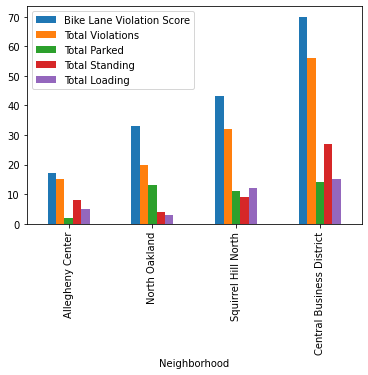

In [119]:
neighborhoodsSorted.plot.bar(x="Neighborhood", y=["Bike Lane Violation Score", "Total Violations", "Total Parked", "Total Standing", "Total Loading"])

Here we can see the surveyed neighboorhoods compared by their total violations and violation types. Viewing the graph, of these neighborhoods, Allegheny Center, which is on the northside, is the best for bikers.

### Combining All the Submetrics into One

First, we will remove the neighborhoods that did not have any data for traffic counts or crashes but not for bike lane violations (as there was not a ton of neighborhoods that did have data for that)

In [120]:
# Create masks to ensure only the neighborhoods with data are portrayed
query_mask = neighborhoods['Highest_Traffic'] > 0
neighborhoods_masked = neighborhoods[query_mask]

query_mask_two = neighborhoods_masked['Number_Of_Crashes'] > 0
neighborhoods_final = neighborhoods_masked[query_mask_two]

neighborhoods_final = neighborhoods_final.drop(columns=["Total Violations", "Total Parked", "Total Standing", "Total Loading"])

neighborhoods_final.head(10)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",0,82.0,41,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",0,94.0,73,43
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",0,82.0,21,0
5,Homewood South,"POLYGON ((-79.88666 40.45521, -79.88651 40.455...",0,76.0,79,0
7,Oakwood,"POLYGON ((-80.06322 40.42788, -80.06322 40.427...",0,94.0,10,0
8,North Oakland,"POLYGON ((-79.94969 40.45259, -79.94969 40.452...",0,91.0,60,33
9,Duquesne Heights,"POLYGON ((-80.01774 40.43972, -80.01783 40.439...",0,956.0,43,0
11,East Liberty,"POLYGON ((-79.91580 40.46081, -79.91577 40.460...",0,89.0,77,0
12,Westwood,"POLYGON ((-80.04439 40.43820, -80.04425 40.438...",0,819.0,16,0
13,Morningside,"POLYGON ((-79.93183 40.49041, -79.93159 40.490...",0,84.0,21,0


### Calculation with Weighted Sum (WS)

We will use a weighted sum to calculate which neighborhood is the best in terms of drivers/roads.

The proportions we will use are as follows:

* Traffic Counts: .35
* Crash Counts: .60
* Bike Lane Violations: .05

In [137]:
for i, neighborhood in neighborhoods_final.iterrows():
    weighted_sum = neighborhood["Highest_Traffic"]*.35
    weighted_sum = weighted_sum + neighborhood["Number_Of_Crashes"]*.60
    weighted_sum = weighted_sum + neighborhood["Bike Lane Violation Score"]*.05
    neighborhoods_final.at[i, 'WS'] = weighted_sum
    
neighborhoods_final.head(10)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
0,Point Breeze North,"POLYGON ((-79.90560 40.45522, -79.90553 40.455...",53.30,82.0,41,0
1,Squirrel Hill North,"POLYGON ((-79.91309 40.43804, -79.91321 40.438...",78.85,94.0,73,43
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",41.30,82.0,21,0
5,Homewood South,"POLYGON ((-79.88666 40.45521, -79.88651 40.455...",74.00,76.0,79,0
7,Oakwood,"POLYGON ((-80.06322 40.42788, -80.06322 40.427...",38.90,94.0,10,0
8,North Oakland,"POLYGON ((-79.94969 40.45259, -79.94969 40.452...",69.50,91.0,60,33
9,Duquesne Heights,"POLYGON ((-80.01774 40.43972, -80.01783 40.439...",360.40,956.0,43,0
11,East Liberty,"POLYGON ((-79.91580 40.46081, -79.91577 40.460...",77.35,89.0,77,0
12,Westwood,"POLYGON ((-80.04439 40.43820, -80.04425 40.438...",296.25,819.0,16,0
13,Morningside,"POLYGON ((-79.93183 40.49041, -79.93159 40.490...",42.00,84.0,21,0


Now that we have calculated the weighted sums, we will now sort and list them.

In [138]:
neighborhoods_final_ascending = neighborhoods_final.sort_values("WS", ascending = True)

neighborhoods_final_ascending.head(10)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
79,Spring Garden,"POLYGON ((-79.98687 40.47413, -79.98598 40.472...",9.400000,8.000000,11,0
49,Arlington,"POLYGON ((-79.95773 40.41871, -79.95769 40.418...",11.783333,9.666667,14,0
83,Perry South,"POLYGON ((-80.01422 40.47745, -80.01435 40.477...",31.350000,9.000000,47,0
69,Spring Hill-City View,"POLYGON ((-79.99761 40.47460, -79.99761 40.474...",35.250000,63.000000,22,0
23,Fairywood,"POLYGON ((-80.08808 40.45975, -80.08803 40.459...",35.300000,94.000000,4,0
7,Oakwood,"POLYGON ((-80.06322 40.42788, -80.06322 40.427...",38.900000,94.000000,10,0
58,Esplen,"POLYGON ((-80.05154 40.46364, -80.05140 40.463...",40.300000,98.000000,10,0
48,South Side Slopes,"POLYGON ((-79.99713 40.42920, -79.99547 40.428...",41.125000,9.500000,63,0
2,Garfield,"POLYGON ((-79.93457 40.47217, -79.93455 40.472...",41.300000,82.000000,21,0
13,Morningside,"POLYGON ((-79.93183 40.49041, -79.93159 40.490...",42.000000,84.000000,21,0


We will also list the neighborhoods with the highest weighted sums.

In [139]:
neighborhoods_final_descending = neighborhoods_final.sort_values("WS", ascending = False)

neighborhoods_final_descending.head(10)

,Neighborhood,Geometry,WS,Highest_Traffic,Number_Of_Crashes,Bike Lane Violation Score
62,South Oakland,"POLYGON ((-79.95899 40.43665, -79.95887 40.436...",422.00,976.0,134,0
21,Lincoln-Lemington-Belmar,"MULTIPOLYGON (((-79.90496 40.48522, -79.90470 ...",387.70,986.0,71,0
72,Beechview,"POLYGON ((-80.02121 40.42342, -80.02111 40.423...",379.95,993.0,54,0
60,Hazelwood,"POLYGON ((-79.95505 40.42713, -79.95498 40.427...",374.55,981.0,52,0
22,Bluff,"POLYGON ((-79.99390 40.43893, -79.99381 40.438...",372.25,839.0,131,0
87,Elliott,"POLYGON ((-80.02795 40.44463, -80.02806 40.444...",365.05,983.0,35,0
29,North Shore,"POLYGON ((-79.99529 40.44985, -79.99535 40.449...",364.10,886.0,90,0
9,Duquesne Heights,"POLYGON ((-80.01774 40.43972, -80.01783 40.439...",360.40,956.0,43,0
33,Crafton Heights,"POLYGON ((-80.04222 40.44447, -80.04241 40.444...",360.00,984.0,26,0
57,West End,"POLYGON ((-80.02821 40.44427, -80.02821 40.444...",358.75,953.0,42,0


Interestingly enough, South Oakland would be the worst neighborhood by our metric! However, the important part is declaring the best.

## Spring Garden wins as the neighborhood with the best drivers/roads!

Since that had the lowest weighted sum, it is the winner. We were looking for the lowest WS because we were adding up the number of crashes, traffic counts, and bike lane violations. Thus, the neighborhood with the lower numbers for that value have good stats when it comes to driving.

Finally, we will plot our calculated wieghted sums on the geodataframe to see how all the neighborhoods played out.

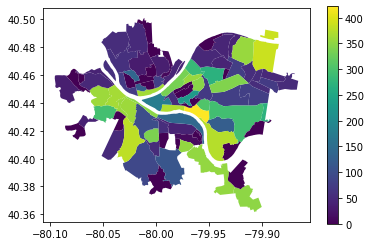

In [142]:
# Load in the neighborhoods again for assurance
neighborhood_gpd = gpd.read_file("Ben's Traffic Data and Notebook/Neighborhoods_.shp")

neighborhood_gpd["WS"] = 0

# Loop through each neighborhood to match the two dataframes
for j, neighborhood in neighborhoods_final.iterrows():
    neighborhood_gpd.loc[neighborhood_gpd["hood"] == neighborhood["Neighborhood"], "WS"] = neighborhood["WS"]

neighborhood_gpd.plot(column="WS", legend=True)

### Conclusions

* **Ben:** I am a little suprised about this result, but it also does not seem too unreasonable at the same time. I only say I am a bit shocked because when we first calculated the winner, which came out to be Spring Garden, I googled the neighborhood and looked at images. The roads looked fairly steep and curvy, which I would expect to cause a bit more traffic and/or collisions. However, after I thought about it a bit more, this neighborhood does make sense because it is far enough away from downtown and other major regions, so it likely gets less traffic flowing through anyways. Regardless, this was a very interesting thing to analyze.